# imports

In [13]:
import numpy as np
import os

from matplotlib import rcParams
from pydrake.all import MosekSolver

from src.MyTerrain import Terrain
from src.MyGCS import GCS
from utils.utils_plot import animate_footstep_plan_gcs
rcParams["figure.figsize"] = (10, 10)

enter mosek license path

In [14]:

os.environ["MOSEKLM_LICENSE_FILE"] = "/Users/ikozaslan/Documents/github_workspace/drake_workspace/drake_venv/lib/python3.13/site-packages/mosek/mosek.lic"

print("MOSEK ENABLED", MosekSolver().enabled())

MOSEK ENABLED True


# Generate terrain

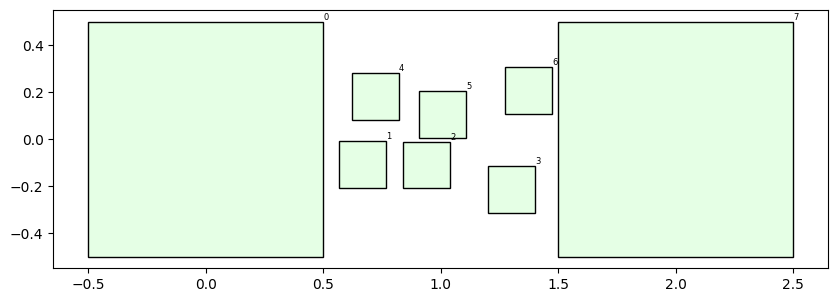

In [15]:
stone_length = .50

terrain = Terrain(
            init_center_xy=[0,0],
            target_center_xy=[2,0.0],
            init_wh=[0.5, 0.5],
            target_wh=[0.5, 0.5],
            num_bridges_y=2,
            num_stones_in_bridge=3,
            bridge_stone_wh=[0.1, 0.1],
            bridges_dist_y=0.4,
            bridges_centerline_y=0.0,
            rand_radius=0.50,#should be in [0,1] for no overlapped stones
            rand_seed=1,
        )
terrain.plot()

erase some stones using indices

In [16]:
erase_index = []
# terrain.erase_bridge_stone(erase_index)

# terrain.plot()

Initial and final pose 

In [17]:
ideal_pose = np.array([
 [ 0.25,  0.15],
 [ 0.25, -0.15],
 [-0.15,  0.15],
 [-0.15, -0.15],
 ])

# swing legs
swing_order = [0,3,1,2]

# Graph of Convex Sets

In [18]:

gcs = GCS(
            terrain=terrain,
            ideal_pose=ideal_pose,
            step_span_prunning=[0.75, 0.11, 0.5, 0.2], # [x_max, x_min, y_max, y_min] for inital pruning
            vertical_limits=[0.5, -0.2, 0.4, 0.1], # [x_max, x_min, y_max, y_min]
            horizontal_limits=[.9, 0.2, 0.3, -0.2],
            gcs_solver=MosekSolver(),
            convex_relaxation=True,
            gcs_print_console=True, 
            max_step_len=0.5,
            swing_order=swing_order,
            bridge_x_shift=0.0, 
            copy_vertex_count=12,
            erase_index=erase_index,
        )

# Solve
pos_fl, pos_fr, pos_rl, pos_rr, cost = gcs.GCS_footstep_planner()



# step_positions_xy = np.stack([pos_fl, pos_fr, pos_rl, pos_rr], axis=1)[1:,:]

GCS: creating edge list while pruning... this may take a while if number of stones > 10
Pruning Complete: Reduced 4096 combinations to 110.
Valid foot configurations: (fl, fr, rl, rr):
[(0, 0, 0, 0), (0, 1, 0, 0), (0, 2, 0, 0), (0, 2, 0, 1), (0, 3, 0, 0), (0, 3, 0, 1), (0, 3, 0, 2), (0, 7, 0, 1), (0, 7, 0, 2), (0, 7, 0, 3), (0, 7, 0, 7), (4, 0, 0, 0), (4, 1, 0, 0), (4, 2, 0, 0), (4, 2, 0, 1), (4, 3, 0, 0), (4, 3, 0, 1), (4, 3, 0, 2), (4, 7, 0, 1), (4, 7, 0, 2), (4, 7, 0, 3), (4, 7, 0, 7), (5, 0, 0, 0), (5, 0, 4, 0), (5, 1, 0, 0), (5, 1, 4, 0), (5, 2, 0, 0), (5, 2, 0, 1), (5, 2, 4, 0), (5, 2, 4, 1), (5, 3, 0, 0), (5, 3, 0, 1), (5, 3, 0, 2), (5, 3, 4, 0), (5, 3, 4, 1), (5, 3, 4, 2), (5, 7, 0, 1), (5, 7, 0, 2), (5, 7, 0, 3), (5, 7, 0, 7), (5, 7, 4, 1), (5, 7, 4, 2), (5, 7, 4, 3), (5, 7, 4, 7), (6, 0, 4, 0), (6, 0, 5, 0), (6, 1, 4, 0), (6, 1, 5, 0), (6, 2, 4, 0), (6, 2, 4, 1), (6, 2, 5, 0), (6, 2, 5, 1), (6, 3, 4, 0), (6, 3, 4, 1), (6, 3, 4, 2), (6, 3, 5, 0), (6, 3, 5, 1), (6, 3, 5, 2), (6

INFO:drake:Solved GCS shortest path using MOSEK with convex_relaxation=true and preprocessing=false and rounding.
INFO:drake:Found 29 unique paths, discarded 71 duplicate paths.
INFO:drake:Finished 29 rounding solutions with MOSEK.


Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : QO (quadratic optimization problem)
  Constraints            : 652             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 184             
  Matrix variables       : 0               
  Integer variables      : 0               

Problem
Optimizer started.
  Name                   :                 
  Objective sense        : minimize        
  Type                   : QO (quadratic optimization problem)
  Constraints            : 776             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 216             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Quadratic to conic reformu